RF Beeswarm Plot


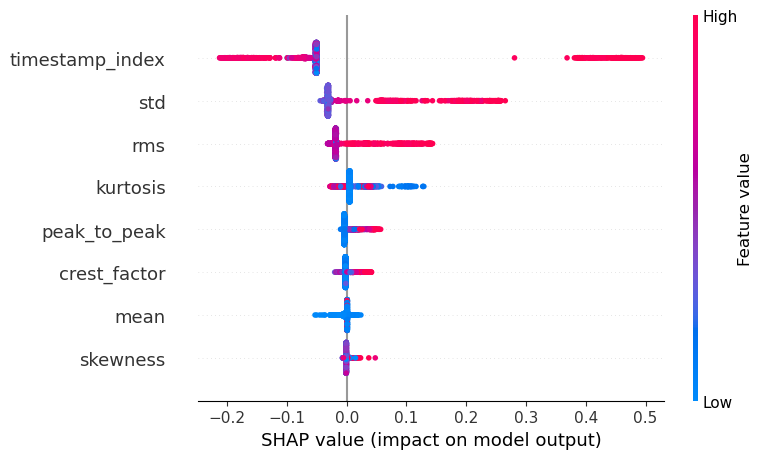

RF Bar Plot


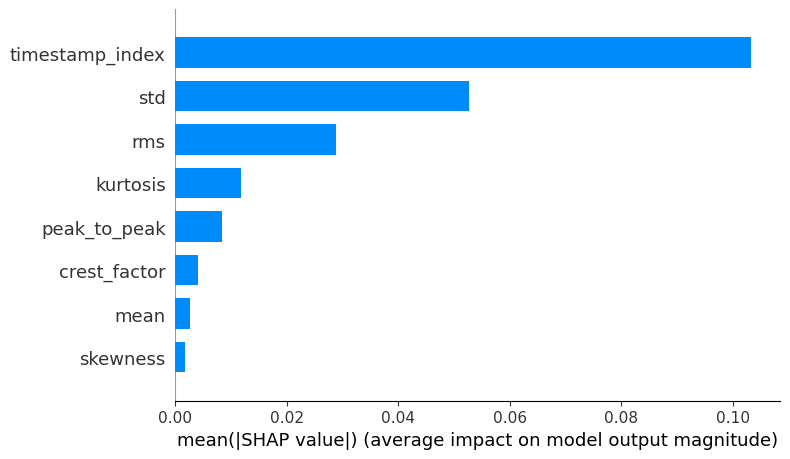

XGBoost Beeswarm Plot


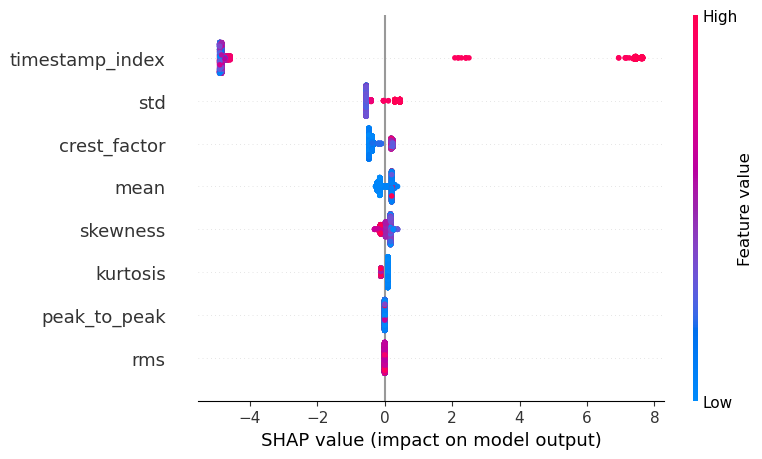

XGBoost Bar Plot


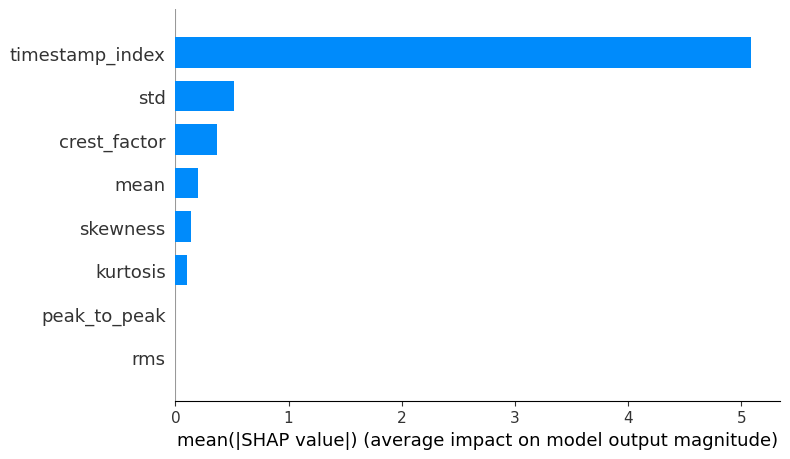

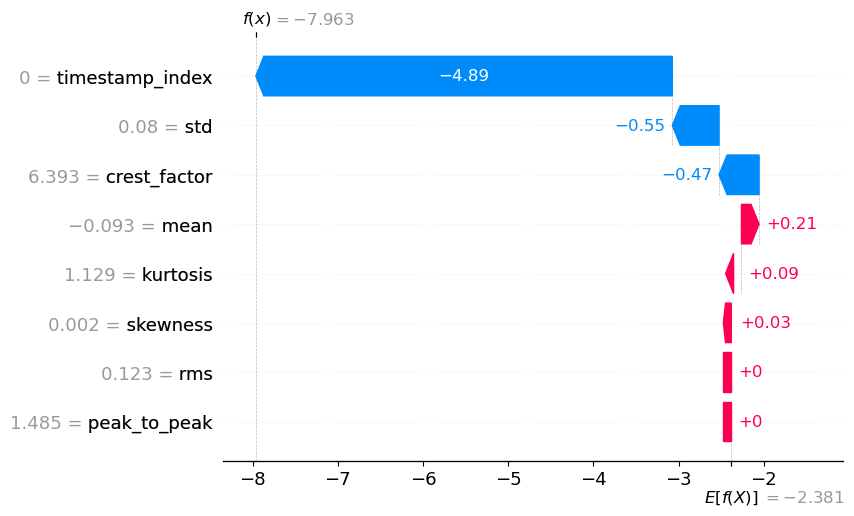

In [2]:
# 1. Imports
import pandas as pd
import shap
import joblib
import matplotlib.pyplot as plt

# 2. Load data
file_path = "C:/Users/ammar/SHAP_ML/outputs/bearing_classification.csv"
df = pd.read_csv(file_path)
X = df.drop(columns=["label", "filename"])
y = df["label"]

# 3. Load models
rf = joblib.load("C:/Users/ammar/SHAP_ML/models/rf_model_bearing.pkl")
xgb = joblib.load("C:/Users/ammar/SHAP_ML/models/xgb_model_bearing.pkl")

# 4. SHAP for Random Forest
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf_all = explainer_rf.shap_values(X)

# Extract class 1 SHAP values
if isinstance(shap_values_rf_all, list):
    shap_values_rf = shap_values_rf_all[1]
else:
    shap_values_rf = shap_values_rf_all[:, :, 1] if shap_values_rf_all.ndim == 3 else shap_values_rf_all

print("RF Beeswarm Plot")
shap.summary_plot(shap_values_rf, X)

print("RF Bar Plot")
shap.summary_plot(shap_values_rf, X, plot_type="bar")

# 5. SHAP for XGBoost
explainer_xgb = shap.TreeExplainer(xgb)
shap_values_xgb_all = explainer_xgb.shap_values(X)

if isinstance(shap_values_xgb_all, list):
    shap_values_xgb = shap_values_xgb_all[1]
else:
    shap_values_xgb = shap_values_xgb_all

print("XGBoost Beeswarm Plot")
shap.summary_plot(shap_values_xgb, X)

print("XGBoost Bar Plot")
shap.summary_plot(shap_values_xgb, X, plot_type="bar")

# 6. Force + Waterfall plot (XGBoost example)
i = 0
shap.initjs()
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[i], X.iloc[i])
shap.plots.waterfall(shap.Explanation(
    values=shap_values_xgb[i],
    base_values=explainer_xgb.expected_value,
    data=X.iloc[i],
    feature_names=X.columns.tolist()
))

# 7. Save SHAP values and input features
pd.DataFrame(shap_values_rf, columns=X.columns).to_csv("C:/Users/ammar/SHAP_ML/outputs/shap_rf_rul.csv", index=False)
pd.DataFrame(shap_values_xgb, columns=X.columns).to_csv("C:/Users/ammar/SHAP_ML/outputs/shap_xgb_rul.csv", index=False)
X.to_csv("C:/Users/ammar/SHAP_ML/outputs/X_bearing.csv", index=False)